<a href="https://colab.research.google.com/github/tayfununal/PyTorch/blob/main/to_Uniform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import random
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from torch import nn
import matplotlib.pyplot as plt


%matplotlib inline
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

Data shape (1797, 64)


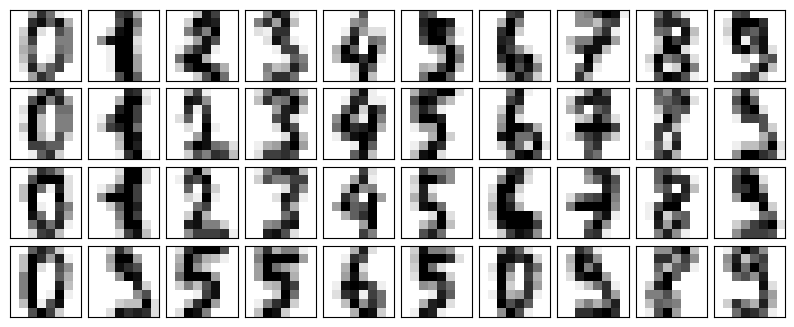

In [92]:
from sklearn.datasets import load_digits


digits = load_digits()
X = digits.data
print('Data shape', X.shape)


def plot_digits(data, w=8):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(w, w),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

plot_digits(digits.data)


In [93]:
class Data(Dataset):
    def __init__(self, dataset):
        super(Data, self).__init__()

        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        x = self.dataset[idx]
        return x

In [94]:
class To_Uniform(torch.nn.Module):

    def __init__(self, input_dim, hidden_layer, output_dim):
        super(To_Uniform, self).__init__()

        self.input_dim = input_dim
        self.hidden_layer = hidden_layer
        self.output_dim = output_dim

        self.linear1 = nn.Sequential(
            nn.Linear(self.input_dim, self.hidden_layer),
            nn.Sigmoid(),
            nn.BatchNorm1d(self.hidden_layer)
        )
        self.linear2 = nn.Sequential(
            nn.Linear(self.hidden_layer, self.hidden_layer),
            nn.Sigmoid(),
            nn.BatchNorm1d(self.hidden_layer)
        )
        self.linear3 = nn.Sequential(
            nn.Linear(self.hidden_layer, self.hidden_layer),
            nn.Sigmoid(),
            nn.BatchNorm1d(self.hidden_layer)
        )
        self.linear4 = nn.Sequential(
            nn.Linear(self.hidden_layer, self.hidden_layer),
            nn.Sigmoid(),
            nn.BatchNorm1d(self.hidden_layer)
        )
        self.linear5 = nn.Sequential(
            nn.Linear(self.hidden_layer, self.output_dim),
            nn.Sigmoid(),
            nn.BatchNorm1d(self.output_dim)
        )

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        x = self.linear4(x)
        x = self.linear5(x)
        return x

    def criterion(self, y, y_hat):
      return - nn.MSELoss()(y, y_hat)

In [95]:
X = digits.data
X = X.reshape(1797, 64)
X = (X - X.min()) / (X.max()-X.min())

X = Data(torch.from_numpy(X).type(torch.float32))
y = torch.from_numpy(digits.target).type(torch.float32)

In [96]:
model = To_Uniform(64, 512, 24)

In [97]:
train_loader = DataLoader(X, batch_size=500, shuffle=False)

In [98]:
epochs = 10
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.005)


COST = []

for i in range(50):

  x_ = X[:].type(torch.float32) + torch.normal(mean=0.0, std=0.000001, size=(X[:].shape[0], 64)).type(torch.float32)

  for epoch in range(epochs):
      total_loss = []

      for index, x_batch in enumerate(train_loader, start=0):

          y_hat = model(x_[index*500: (index+1)*500])
          y_pred = model(x_batch)

          loss = model.criterion(y_pred, y_hat)

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          total_loss.append(loss.item())

      COST.append(np.mean(total_loss))

      if epoch==0:
          print("Epoch : ", epoch+1, "  -----------> Loss : ", np.mean(total_loss))
      elif (epoch+1)%10 == 0:
          print("Epoch : ", epoch+1, "  -----------> Loss : ", np.mean(total_loss))

Epoch :  1   -----------> Loss :  -2.2987494720239088e-11
Epoch :  10   -----------> Loss :  -2.3350735407767775e-11
Epoch :  1   -----------> Loss :  -2.3221912240356524e-11
Epoch :  10   -----------> Loss :  -2.410645511333187e-11
Epoch :  1   -----------> Loss :  -2.4707391080985852e-11
Epoch :  10   -----------> Loss :  -2.5085000483066056e-11
Epoch :  1   -----------> Loss :  -2.4965310634755822e-11
Epoch :  10   -----------> Loss :  -2.575561812434568e-11
Epoch :  1   -----------> Loss :  -2.6167580255420653e-11
Epoch :  10   -----------> Loss :  -2.7084303983598845e-11
Epoch :  1   -----------> Loss :  -2.7066846593898353e-11
Epoch :  10   -----------> Loss :  -2.8026390236357557e-11
Epoch :  1   -----------> Loss :  -2.8569617158136218e-11
Epoch :  10   -----------> Loss :  -2.94316459224786e-11
Epoch :  1   -----------> Loss :  -2.9027661350988776e-11
Epoch :  10   -----------> Loss :  -3.0277164022457503e-11
Epoch :  1   -----------> Loss :  -3.0705498040017876e-11
Epoch :  1

In [99]:
Y = model(X[:])

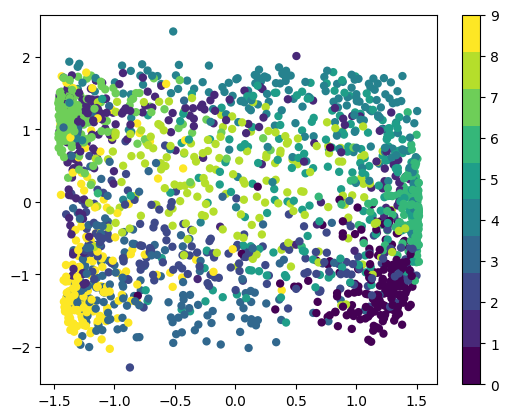

In [100]:
plt_1 = plt.scatter(Y[:,0].detach().numpy(), Y[:,1].detach().numpy(), c=digits.target, edgecolor='none',
            cmap=plt.get_cmap('viridis', 10))
plt.colorbar(plt_1)
plt.show()